In [1]:
from pathlib import Path
import os
SRC=os.path.join(Path.cwd().parent, 'chromdyn')
import sys
sys.path.append(SRC)
from Topology import TopologyGenerator
from ChromatinDynamics import ChromatinDynamics
import openmm.unit as unit
import numpy as np
from Reporters import save_pdb
import h5py

In [2]:
generator = TopologyGenerator()
generator.gen_top([100])


In [46]:
d1=list(list(generator.topology.chains())[1].atoms())[0]
d2=list(list(generator.topology.chains())[1].atoms())[-1]
m1 = list(list(generator.topology.chains())[0].atoms())[5]
m2 = list(list(generator.topology.chains())[0].atoms())[15]

generator.topology.addBond(d1,m1)
generator.topology.addBond(d2,m2)


In [3]:
generator.topology.getNumBonds()

99

In [16]:
sim = ChromatinDynamics(generator.topology, 'test', output_dir=f'{Path.cwd()}/output', console_stream=False, platform_name="OpenCL")

In [17]:
# sim.force_field.add_default_forces(mode='gauss')
sim.force_field.add_harmonic_bonds()
# sim.force_field_manager.removeCOM()
# sim.force_field_manager.add_self_avoidance()
sim.force_field.add_lennard_jones_force()
sim.force_field.add_flat_bottom_harmonic()


In [18]:
sim.simulation_setup(init_struct='saw3D',save_pos=True, save_energy=True)

In [19]:
for i in range(2):        
    sim.run(50000)
    sim.print_force_info()
    # save_pdb(sim)
# sim.simulation.reporters[-1].close()

In [18]:
pos = h5py.File('output/test_positions.cndb', 'r')
print(pos.keys(),pos['0'].shape)

<KeysViewHDF5 ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '3', '4', '5', '6', '7', '8', '9']> (100, 3)


In [19]:
import matplotlib.pyplot as plt


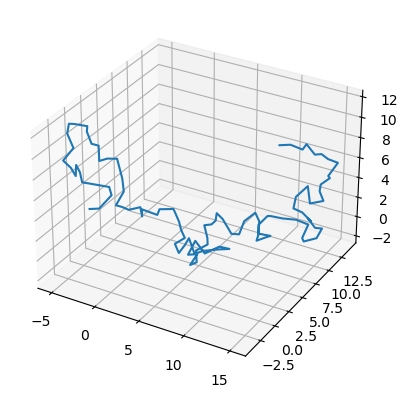

In [20]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n=str(np.random.randint(0,90))
ax.plot(pos[n][:,0], pos[n][:,1], pos[n][:,2])

In [4]:
import numpy as np

In [12]:
int(np.ceil(1.05))

2